## Importer les bibliothèques nécessaires.


In [8]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import random



## Charger les images du dataset et vérifier leurs extensions (jpeg, jpg, bmp, png). Supprimer celles qui ne correspondent pas.

In [4]:
dataset_path = r"../data\Blood_Cells_Cancer"
exts = (".jpg", ".jpeg", ".png", ".bmp")
images = []
labels = []

for root, _, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        if not file.lower().endswith(exts):
            os.remove(file_path)
            continue
        try:
            img = cv2.imread(file_path)
            if img is None:
                raise Exception("Image corrompue ou non lisible")
            images.append(img)
            class_name = os.path.basename(root)
            labels.append(class_name)
        except Exception as e:
            os.remove(file_path)

print(f"Nombre d’images chargées : {len(images)}")
print(f"Nombre d’étiquettes : {len(labels)}")

Nombre d’images chargées : 3242
Nombre d’étiquettes : 3242


## Explorer les classes du dataset (les noms des dossiers représentent les classes).

In [5]:
folder = r"../data\Blood_Cells_Cancer\Blood cell Cancer [ALL]" 
classes = []

for d in os.listdir(folder):
    full_path = os.path.join(folder, d)
    if os.path.isdir(full_path):
        classes.append(d)

print(f"Nombre de classes trouvées : {len(classes)}")
print("Classes :", classes)

Nombre de classes trouvées : 4
Classes : ['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']


## Montrer un échantillon d’images pour chaque classe.

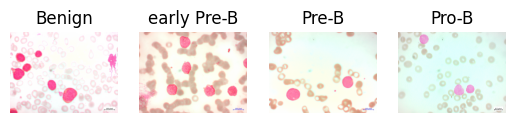

In [6]:
echantillon_images = {}

for i in range(len(images)):
    lable = labels[i]
    if lable not in echantillon_images:
        echantillon_images[lable] = images[i]
i=0
for label in echantillon_images:
    plt.subplot(1,4,i+1)
    plt.imshow(echantillon_images[label])
    plt.title(label)
    plt.axis('off')
    i+=1
    
plt.show()   

C:\Users\salma\AppData\Local\Temp\ipykernel_13208\342345291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="viridis")


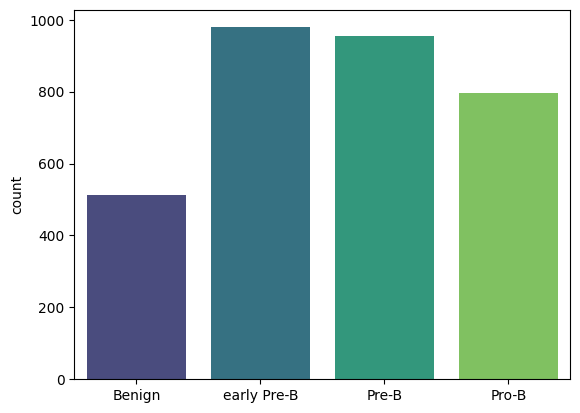

In [10]:
from collections import Counter

class_counts = Counter(labels)


classes  = list(class_counts.keys())
counts = list(class_counts.values())

sns.countplot(x=labels, palette="viridis")
plt.show()

In [ ]:
import joblib
joblib.dump((images,labels), "../data/processed_data.pkl")